<a href="https://colab.research.google.com/github/cam2149/AnalisisDatosI/blob/main/Entregable_AnalisisMultivariado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img height="45px" src="https://drive.google.com/uc?id=1dusNXTL_M0CB5BJDB_GCvTKNCqYz10U6"align="left" hspace="10px" vspace="0px"></p>

<h1>Preparación de los datos</h1>


---

# **Introducción**

Cuando se realiza un proceso de comprensión de los datos, es posible encontrar algunos problemas potenciales que deben abordarse antes de la estapa de modelado.
En este entregable, se manejaran algunos problemas frecuentes de calidad de datos y preparar el conjunto de datos correctamente (instancias o atributos duplicados o irrelevantes, valores incorrectos, valores perdidos).
<br><br>
**Importar los datos**

Para iniciar, importe la librería pandas y lea el archivo CSV que contiene el *dataset*, utilizando el método ```read_csv()```y la dirección URL https://github.com/cam2149/eda_couse/blob/77b1d4f0b5f7c129cb9ff94b126710c0677822b1/data/Reporte_cronicos_ESE_Ago_2016.csv que almacena los datos.


In [ ]:
# Importar librería pandas
# Importamos las librerías

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

!pip install openpyxl
# Estilos

rcParams['figure.figsize'] = (12,  6)


In [ ]:
# URL del dataset
filename = "https://github.com/cam2149/eda_couse/blob/5f126b3d4510c1ab398b70bbfacead078b183139/data/Churn_Modelling.csv"

df = pd.read_csv(filename)

ParserError: Error tokenizing data. C error: Expected 1 fields in line 40, saw 26


Utilice el método ```head()```para visualizar las primeras cinco filas del *data frame*.

In [ ]:
# Para ver cómo luce el dataset, utilizamos el método head().
df.head()

,factor-riesgo,perdida-promedio-anual,fabricante,tipo-combustible,aspiracion,num-puertas,estilo-carroceria,traccion,ubicacion-motor,distancia-entre-ejes,...,tamano-motor,sistema-combustible,calibre,carrera,relacion-compresion,caballos-fuerza,pico-rpm,millas_por_galon_ciudad,millas_por_galon_carretera,precio
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# **Identificar y manejar valores perdidos**

Si ejecutó el código anterior, pudo darse cuenta que aparecen signos de interrogación en algunas celdas; esos son valores perdidos que pueden dificultar nuestro análisis posterior. ¿Cómo podemos identificar y lidiar con esos valores perdidos en el *data frame*?
<br><br>
Pasos para trabajar con datos perdidos.
* Identificar valores perdidos
* Lidiar con valores perdidos
* Corregir formato de datos

## Identificar valores perdidos
* ***Convertir "?" a NaN***

En nuestro conjunto de datos, los datos perdidos están marcados con un signo de interrogación "?". Para que pandas reconozca la existencia de valores perdidos dentro del *data frame*, es necesarios marcarlos como tal. En este caso, el marcador predeterminado que utiliza Python es **NaN (Not a Number)**.
<br><br>
Utilizaremos la función ```.replace(A, B, inplace = True)```para reemplazar A por B. Para poder utilizar esta función, debe importar la librería ```numpy```.

In [ ]:
import numpy as np

# Reemplazar "?" por NaN
df.replace("?", np.nan, inplace = True)
df.head(5)

,factor-riesgo,perdida-promedio-anual,fabricante,tipo-combustible,aspiracion,num-puertas,estilo-carroceria,traccion,ubicacion-motor,distancia-entre-ejes,...,tamano-motor,sistema-combustible,calibre,carrera,relacion-compresion,caballos-fuerza,pico-rpm,millas_por_galon_ciudad,millas_por_galon_carretera,precio
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


* ***Evaluar los datos perdidos***
Una vez convertidos los datos perdidos a los valores predeterminados de Python, pasamos a utilizar funciones integradas de Python que nos permiten identificar estos datos. Hay tres métodos para detectar valores perdidos: ```.isnull()```, ```.notnull()``` y ```.isna()```. Sus salidas son un valor booleano que indica si el valor que se pasa en los argumentos es un dato perdido.

In [ ]:
missing_data = df.isnull()
missing_data.head(5)

,factor-riesgo,perdida-promedio-anual,fabricante,tipo-combustible,aspiracion,num-puertas,estilo-carroceria,traccion,ubicacion-motor,distancia-entre-ejes,...,tamano-motor,sistema-combustible,calibre,carrera,relacion-compresion,caballos-fuerza,pico-rpm,millas_por_galon_ciudad,millas_por_galon_carretera,precio
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


En el ejemplo anterior, "True" significa valor perdido, mientras que "False" significa valor no perdido.

* ***Contar los valores perdidos de cada columna***

Utilizando un bucle ```for``` podemos calcular el número de valores perdidos de cada columna. Como se mencionó anteriormente, "True" representa un valor faltante, mientras que "False" significa que el valor sí está presente en el conjunto de datos. En el cuerpo del bucle ```for``` que ejecutará a continuación, el método ```.value_counts()``` cuenta el número de valores "True".

In [ ]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

factor-riesgo
factor-riesgo
False    205
Name: count, dtype: int64

perdida-promedio-anual
perdida-promedio-anual
False    164
True      41
Name: count, dtype: int64

fabricante
fabricante
False    205
Name: count, dtype: int64

tipo-combustible
tipo-combustible
False    205
Name: count, dtype: int64

aspiracion
aspiracion
False    205
Name: count, dtype: int64

num-puertas
num-puertas
False    203
True       2
Name: count, dtype: int64

estilo-carroceria
estilo-carroceria
False    205
Name: count, dtype: int64

traccion
traccion
False    205
Name: count, dtype: int64

ubicacion-motor
ubicacion-motor
False    205
Name: count, dtype: int64

distancia-entre-ejes
distancia-entre-ejes
False    205
Name: count, dtype: int64

longitud
longitud
False    205
Name: count, dtype: int64

anchura
anchura
False    205
Name: count, dtype: int64

altura
altura
False    205
Name: count, dtype: int64

peso-vacio
peso-vacio
False    205
Name: count, dtype: int64

tipo-motor
tipo-motor
False    205
Name:

Según el resultado anterior, cada columna tiene 205 filas de datos, y existen siete filas que contienen valores perdidos:

1.   "perdida-promedio-anual": 41 valores perdidos
2.   "num-puertas": 2 valores perdidos
3.   "calibre": 4 valores perdidos
4.   "carrera" : 4 valores perdidos
5.   "caballos-fuerza": 2 valores perdidos
6.   "pico-rpm": 2 valores perdidos
7.   "precio": 4 valores perdidos

## Ejercicio 1

Para contar los valores perdidos que hay en cada atributo, también puede utilizar la función ```.sum()``` después de cualquiera de las funciones para detectar valores perdidos en el *data frame* (```.isnull()```, ```.notnull()```, y ```.isna()```). Esta función sumará todos los valores *True* y proporcionará un resumen para cada atributo, además no tendrá necesidad de utilizar un bucle.
<br><br>
**Vea el resumen de los valores perdidos para los atributos del dataset.** Ingrese sus líneas de código a continuación:

In [ ]:
#Escriba su código a continuación y presione Shift + Enter para ejecutar
df.isna().sum()


,0
factor-riesgo,0
perdida-promedio-anual,41
fabricante,0
tipo-combustible,0
aspiracion,0
num-puertas,2
estilo-carroceria,0
traccion,0
ubicacion-motor,0
distancia-entre-ejes,0


In [ ]:
df.isnull().sum()

,0
factor-riesgo,0
perdida-promedio-anual,41
fabricante,0
tipo-combustible,0
aspiracion,0
num-puertas,2
estilo-carroceria,0
traccion,0
ubicacion-motor,0
distancia-entre-ejes,0


**SOLUCIÓN DEL EJERCICIO:**

Haga doble clic **aquí** para ver la solución del Ejercicio 1.

<!-- La respuesta es la siguiente:

# HAY DOS OPCIONES POSIBLES PARA CONTAR LOS VALORES PERDIDOS DE CADA COLUMNA:

# Opción 1:
df.isna().sum()

# Opción 2:
df.isnull().sum()

-->

## Lidiar con valores perdidos

Cuando tenemos un *dataset* con valores perdidos, podemos tomar las siguientes decisiones:

* Eliminar datos
 *   Eliminar toda la fila
 *   Eliminar toda la columna

* Reemplazar datos
 *   Reemplazar por la media (o promedio)
 *   Reemplazar por la frecuencia
 *   Reemplazar en función de otras funciones


Tenga en cuenta que una columna entera se puede descartar solo si la mayoría de sus valores están vacíos. En nuestro conjunto de datos, ninguna de las columnas está lo suficientemente vacía como para eliminarla por completo, así que reemplazaremos los valores perdidos. En este punto, tenemos cierta libertad para elegir el método de reemplazo, sin embargo, algunos métodos pueden parecer más razonables que otros. Aquí aplicaremos cada método a diferentes columnas:
<br><br>
* ***REEMPLAZAR POR LA MEDIA:*** <br>
"perdida-promedio-anual", "carrera", "calibre", "caballos-fuerza", y "pico-rpm".

Para empezar, necesitamos conocer la media de las columnas donde se hará el reemplazo por media. Entonces, debemos calcular el promedio de dichas columnas. En el siguiente ejemplo hacemos el cálculo de tres de ellas:

In [ ]:
# Promedio/media de la columna perdida-promedio-anual
avg_perdida_promedio_anual = df["perdida-promedio-anual"].astype("float").mean()

# Promedio/media de la columna carrera
avg_carrera = df["carrera"].astype("float").mean()

# Promedio/media de la columna calibre
avg_calibre = df["calibre"].astype("float").mean()

# Imprimir los resultados
print("Promedio de perdida-promedio-anual:", avg_perdida_promedio_anual)
print("Promedio de carrera:", avg_carrera)
print("Promedio de calibre:", avg_calibre)

Promedio de perdida-promedio-anual: 122.0
Promedio de carrera: 3.255422885572139
Promedio de calibre: 3.3297512437810943


Luego, reemplazamos "NaN" por el valor promedio de la columna donde deseamos hacer el reemplazo. Veamos el reemplazo para las tres columnas anteriores, utilizando el método ```replace()```:

In [ ]:
# Reemplazo de NaN por la media, columna perdida-promedio-anual
df["perdida-promedio-anual"].replace(np.nan, avg_perdida_promedio_anual, inplace=True)

# Reemplazo de NaN por la media, columna carrera
df["carrera"].replace(np.nan, avg_carrera, inplace=True)

# Reemplazo de NaN por la media, columna bore
df["calibre"].replace(np.nan, avg_calibre, inplace=True)

Podemos verificar los cambios en el *data frame*:

In [ ]:
df.head(5)

,factor-riesgo,perdida-promedio-anual,fabricante,tipo-combustible,aspiracion,num-puertas,estilo-carroceria,traccion,ubicacion-motor,distancia-entre-ejes,...,tamano-motor,sistema-combustible,calibre,carrera,relacion-compresion,caballos-fuerza,pico-rpm,millas_por_galon_ciudad,millas_por_galon_carretera,precio
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Ejercicio 2

El método ```.fillna()``` de pandas también nos permite hacer reemplazos, sólo debemos proporcionarle dos parámetros: el valor que imputaremos y ```inplace = True```
<br><br>
**De acuerdo con el ejemplo anterior, reemplace NaN por el promedio en la columna "caballos-fuerza" utilizando el método ```replace()```, y en la columna "pico-rpm" utilizando el método ```fillna()```**. Ingrese sus líneas de código a continuación:

In [ ]:
# prompt: De acuerdo con el ejemplo anterior, reemplace NaN por el promedio en la columna "caballos-fuerza" utilizando el método replace(), y en la columna "pico-rpm" utilizando el método fillna()

# Promedio/media de la columna caballos-fuerza
avg_caballos_fuerza = df["caballos-fuerza"].astype("float").mean()

# Reemplazo de NaN por la media, columna caballos-fuerza
df["caballos-fuerza"].replace(np.nan, avg_caballos_fuerza, inplace=True)

# Promedio/media de la columna pico-rpm
avg_pico_rpm = df["pico-rpm"].astype("float").mean()

# Reemplazo de NaN por la media, columna pico-rpm
df["pico-rpm"].fillna(avg_pico_rpm, inplace=True)


**SOLUCIÓN DEL EJERCICIO:**

Haga doble clic **aquí** para ver la solución del Ejercicio 2.

<!-- La respuesta es la siguiente:

# --- PROCEDIMIENTO PARA LA COLUMNA horsepower ---
avg_caballos_fuerza = df['caballos-fuerza'].astype('float').mean(axis=0)
print("Promedio de caballos-fuerza:", avg_caballos_fuerza)
# Reemplazo con el método replace
df['caballos-fuerza'].replace(np.nan, avg_caballos_fuerza, inplace=True)

# --- PROCEDIMIENTO PARA LA COLUMNA peak-rpm ---
avg_pico_rpm = df['pico-rpm'].astype('float').mean(axis=0)
print("Promedio de pico-rpm:", avg_pico_rpm)
# Reemplazo con el método fillna
df['pico-rpm'].fillna(avg_pico_rpm, inplace=True)

-->


* ***REEMPLAZAR POR LA FRECUENCIA:***<br>
"num-puertas". En este caso la frecuencia es "four" porque el 84% de los automóviles son de cuatro puertas, por lo tanto cuatro puertas es más frecuente y es más probable que ocurra.


Para observar la frecuencia, podemos ver qué valores están presentes en una columna en particular empleando el método ```.value_counts()```:

In [ ]:
df['num-puertas'].value_counts()

,count
num-puertas,
four,114
two,89


Si ejecutó el código anterior pudo darse cuenta que "four" es el número de puertas más común. También podemos usar el método ```.idxmax()``` para calcular el tipo más común automáticamente:

In [ ]:
df['num-puertas'].value_counts().idxmax()

'four'

El procedimiento de reemplazo es muy similar al que vimos anteriormente.

In [ ]:
# Reemplazar los valores perdidos de'num-puertas' por el valor más frecuente
df["num-puertas"].replace(np.nan, "four", inplace=True)

In [ ]:
df.isnull().sum()

,0
factor-riesgo,0
perdida-promedio-anual,0
fabricante,0
tipo-combustible,0
aspiracion,0
num-puertas,0
estilo-carroceria,0
traccion,0
ubicacion-motor,0
distancia-entre-ejes,0


* ***ELIMINAR TODA LA FILA:***<br>
"precio". El precio es lo que queremos predecir. Cualquier instancia sin precio no puede ser utilizada porque no será util para aprender de ella.

El paquete pandas proporciona un método que podemos usar para eliminar fácilmente los valores faltantes: ```.dropna()```. Este método devuelve un nuevo DataFrame sin las filas que tienen valores perdidos. De forma predeterminada, evalúa los valores perdidos de todas las columnas, pero Usted puede especificar una lista de columnas para que centre su búsqueda en esos atributos:

```df.dropna (subset = ['columna'])```
<br><br>
Este método devuelve un nuevo *DataFrame* sin valores perdidos para las columnas especificadas. Si desea reemplazar el conjunto de datos original directamente, puede usar el parámetro ```inplace = True```:

```df.dropna(subset=['columna'], inplace=True)```
<br><br>
Entonces, eliminemos todas las instancias que no tienen datos en el atributo "precio", utilizando el método ```.dropna()```:

In [ ]:
# Elimine la fila/instancia completa que tiene valor NaN en la columna "precio"
df.dropna(subset=["precio"], axis=0, inplace=True)

# Restablezca el índice del dataframe porque se eliminaron dos filas
df.reset_index(drop=True, inplace=True)

Verifiquemos nuevamente cuántos valores perdidos tiene el conjunto de datos

In [ ]:
df.isna().sum()

,0
factor-riesgo,0
perdida-promedio-anual,0
fabricante,0
tipo-combustible,0
aspiracion,0
num-puertas,0
estilo-carroceria,0
traccion,0
ubicacion-motor,0
distancia-entre-ejes,0


**Muy bien!** Ahora, tenemos el *dataset* sin valores perdidos.

## Corregir formato de datos

El último paso en la limpieza de datos es verificar y asegurarse de que todos los datos estén en el formato correcto (*int*, *float*, *text* u otro). En pandas utilizamos los métodos:
```.dtype()``` para ver los tipos de datos, y ```.astype()``` para cambiar tipos de datos.
<br><br>
Veamos los tipos de datos para cada columna:

In [ ]:
df.dtypes

,0
factor-riesgo,int64
perdida-promedio-anual,object
fabricante,object
tipo-combustible,object
aspiracion,object
num-puertas,object
estilo-carroceria,object
traccion,object
ubicacion-motor,object
distancia-entre-ejes,float64


Como podemos ver arriba, algunas columnas no son del tipo de datos correcto. Las variables numéricas deben tener el tipo 'float' o 'int', y las variables con cadenas de texto como categorías deben tener el tipo 'object'. Por ejemplo, las variables 'calibre' y 'carrera' son valores numéricos que describen los motores, por lo que deberíamos esperar que sean del tipo 'float' o 'int'; sin embargo, se muestran como tipo 'objeto'. Tenemos que convertir los tipos de datos a un formato adecuado para cada columna usando el método ```astype()```.
<br><br>
Convirtamos los tipos de datos al formato apropiado:


In [ ]:
df[["calibre", "carrera"]] = df[["calibre", "carrera"]].astype("float")
df[["perdida-promedio-anual"]] = df[["perdida-promedio-anual"]].astype("int")
df[["precio"]] = df[["precio"]].astype("float")
df[["pico-rpm"]] = df[["pico-rpm"]].astype("float")

Veamos los tipos de datos de los atributos después de la conversión:

In [ ]:
df.dtypes

,0
factor-riesgo,int64
perdida-promedio-anual,int64
fabricante,object
tipo-combustible,object
aspiracion,object
num-puertas,object
estilo-carroceria,object
traccion,object
ubicacion-motor,object
distancia-entre-ejes,float64


**Excelente!** Ahora, ya tenemos el conjunto de datos limpio, sin valores perdidos y con todos los datos en su formato adecuado.

# **Estandarización de los tipo de datos**

Los datos se recolectan de diferentes fuentes con diferentes formatos. Por ejemplo, si nuestro *dataset* se recolecta de diferentes agencias, algunas podrían manejar los datos de consumo de combustible en millas por galón (mpg) mientras que otros en kilómetros por galón (km/gal).
<br><br>
**¿Qué es estandarización?**
<br>
Es el proceso de transformar los datos en un formato común que nos permita hacer una comparación con sentido.
<br><br>

*Ejemplo:*

En nuestro *dataset*, las columnas de consumo de combustible "millas_por_galon_ciudad" y "millas_por_galon_carretera" se representan por unidades *mpg* (millas por galón). Supongamos que estamos desarrollando una aplicación en un país que acepta el consumo de combustible con el estándar *L/100km* (litros por 100 kilómetros), entonces necesitaremos aplicar la transformación de datos para convertir *mpg* en *L/100km*.
<br><br>
La fórmula para la conversión es: ```L/100km = 235 / mpg```
<br><br>
Pandas nos permite realizar operaciones directamente con las columnas:


In [ ]:
# Veamos las columnas actuales de nuestro dataframe
df.head()

,factor-riesgo,perdida-promedio-anual,fabricante,tipo-combustible,aspiracion,num-puertas,estilo-carroceria,traccion,ubicacion-motor,distancia-entre-ejes,...,tamano-motor,sistema-combustible,calibre,carrera,relacion-compresion,caballos-fuerza,pico-rpm,millas_por_galon_ciudad,millas_por_galon_carretera,precio
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0


In [ ]:
# Convertir mpg a L/100km con una operación matemática (235 dividido por mpg)
df['ciudad-L/100km'] = 235/df["millas_por_galon_ciudad"]

# Verifiquemos las columnas para visualizar la transformación de los datos
df.head()

,factor-riesgo,perdida-promedio-anual,fabricante,tipo-combustible,aspiracion,num-puertas,estilo-carroceria,traccion,ubicacion-motor,distancia-entre-ejes,...,sistema-combustible,calibre,carrera,relacion-compresion,caballos-fuerza,pico-rpm,millas_por_galon_ciudad,millas_por_galon_carretera,precio,ciudad-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


In [ ]:
df['ciudad-L/100km'].describe()

,ciudad-L/100km
count,201.000000
mean,9.944145
std,2.534599
min,4.795918
25%,7.833333
50%,9.791667
75%,12.368421
max,18.076923


---

*NOTA: El término estandarización también se utiliza para referirse a un tipo particular de normalización, donde se resta la media y se divide por la desviación estándar.*

---

## Ejercicio 3

**Basándose en el ejemplo anterior, transforme mpg a L/100km en la columna "millas_por_galon_carretera" y cambie el nombre de la columna a "carretera-L/100km".** Ingrese sus líneas de código a continuación:


In [ ]:
# Escriba su código a continuación y presione Shift + Enter para ejecutar
# Convertir mpg a L/100km con una operación matemática (235 dividido por mpg)
df['carretera-L/100km'] = 235/df["millas_por_galon_carretera"]

# Verifiquemos las columnas para visualizar la transformación de los datos
df.head()

,factor-riesgo,perdida-promedio-anual,fabricante,tipo-combustible,aspiracion,num-puertas,estilo-carroceria,traccion,ubicacion-motor,distancia-entre-ejes,...,calibre,carrera,relacion-compresion,caballos-fuerza,pico-rpm,millas_por_galon_ciudad,millas_por_galon_carretera,precio,ciudad-L/100km,carretera-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818


In [ ]:
df.drop("carretera-L/100km", axis=1, inplace=True)

In [ ]:
df.head()

,factor-riesgo,perdida-promedio-anual,fabricante,tipo-combustible,aspiracion,num-puertas,estilo-carroceria,traccion,ubicacion-motor,distancia-entre-ejes,...,sistema-combustible,calibre,carrera,relacion-compresion,caballos-fuerza,pico-rpm,millas_por_galon_ciudad,millas_por_galon_carretera,precio,ciudad-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


In [ ]:
#transforme mpg a L/100km en la columna "millas_por_galon_carretera"
df['millas_por_galon_carretera'] = 235/df["millas_por_galon_carretera"]
#cambie el nombre de la columna a "carretera-L/100km"
df.rename(columns={'millas_por_galon_carretera':'carretera-L/100km'}, inplace=True)

In [ ]:
df.head()

,factor-riesgo,perdida-promedio-anual,fabricante,tipo-combustible,aspiracion,num-puertas,estilo-carroceria,traccion,ubicacion-motor,distancia-entre-ejes,...,sistema-combustible,calibre,carrera,relacion-compresion,caballos-fuerza,pico-rpm,millas_por_galon_ciudad,carretera-L/100km,precio,ciudad-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556


**SOLUCIÓN DEL EJERCICIO:**

Haga doble clic **aquí** para ver la solución del Ejercicio 3.

<!-- La respuesta es la siguiente:

# Transformar mpg a L/100km con una operación matemática (235 dividido por mpg)
df["millas_por_galon_carretera"] = 235/df["millas_por_galon_carretera"]

# Re-nombrar el nombre de la columna "millas_por_galon_carretera" a "carretera-L/100km"
df.rename(columns={'millas_por_galon_carretera':'carretera-L/100km'}, inplace=True)

# Verificar la transformación de los datos
df.head()

-->


# **Normalización de los datos**

**¿Qué es la normalización?**

Es el proceso de transformar valores de varias variables a un rango similar. Dentro de las normalizaciones típicas se incluyen: escalar la variable de tal manera que su promedio sea 0, escalar la variable para que la varianza sea 1, o escalar la variable para que los valores de la variable oscilen entre 0 y 1.
<br><br>
*Ejemplo:*

Para demostrar la normalización, supongamos que queremos escalar las columnas "longitud",	"anchura" y	"altura".
* Objetivo: Normalizar esas variables para que su valor oscile entre 0 y 1.
* Enfoque: Reemplazar el valor original por (valor original)/(valor máximo)

In [ ]:
# Reemplazar valor original por (valor original)/(valor máximo)
df['longitud'] = df['longitud']/df['longitud'].max()
df['anchura'] = df['anchura']/df['anchura'].max()

# Ver las columnas escaladas
df[["longitud","anchura"]].head()

,longitud,anchura
0,0.811148,0.890278
1,0.811148,0.890278
2,0.822681,0.909722
3,0.848630,0.919444
4,0.848630,0.922222


## Ejercicio 4

**De acuerdo al ejemplo anterior, normalice la columna "altura".** Ingrese sus líneas de código a continuación:

In [ ]:
# Escriba su código a continuación y presione Shift + Enter para ejecutar
# Reemplazar valor original por (valor original)/(valor máximo)
df['altura'] = df['altura']/df['altura'].max()

# Ver las columnas escaladas
df[["longitud","anchura","altura"]].head()

,longitud,anchura,altura
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


**SOLUCIÓN DEL EJERCICIO:**

Haga doble clic **aquí** para ver la solución del Ejercicio 4.

<!-- La respuesta es la siguiente:

df['altura'] = df['altura']/df['altura'].max()
# Mostrar las columnas escaladas:
df[["longitud","anchura","altura"]].head()

-->

Aquí podemos ver que hemos normalizado "longitud", "anchura" y "altura" en el rango de [0,1].

# **Discretizar valores**

**¿Qué es discretizar?**

Es el proceso de transformar variables numéricas continuas en discretas categóricas.
<br><br>
*Ejemplo:*

En nuestro *dataset*, "caballos-fuerza" es una variable con valores reales entre 48 y 288, y contiene 57 valores únicos. ¿Qué pasa si sólo nos preocupamos por la diferencia de precio entre los automóviles de alta potencia, potencia media y baja potencia (3 tipos)? ¿Podemos reorganizar la variable "caballos-fuerza" de acuerdo a estos tres tipos para simplificr el análisis?
<br><br>
Utilizaremos el método ```cut```de pandas para segmentar la columna "caballos-fuerza" en estas tres categorías.
<br><br>
Primero veamos el tipo de dato de la columna "caballos-fuerza":

In [ ]:
df.dtypes

,0
factor-riesgo,int64
perdida-promedio-anual,int64
fabricante,object
tipo-combustible,object
aspiracion,object
num-puertas,object
estilo-carroceria,object
traccion,object
ubicacion-motor,object
distancia-entre-ejes,float64


Debemos convertir el tipo de dato de "caballos-fuerza" al tipo correcto (int).

In [ ]:
df["caballos-fuerza"]=df["caballos-fuerza"].astype("int", copy=True)

Tracemos el histograma del atributo "caballos-fuerza" para ver cómo luce su distribución. En esta ocasión, utilizaremos la librería ```matploit``` para graficar.

Text(0.5, 1.0, 'caballos de fuerza vs #automóviles')

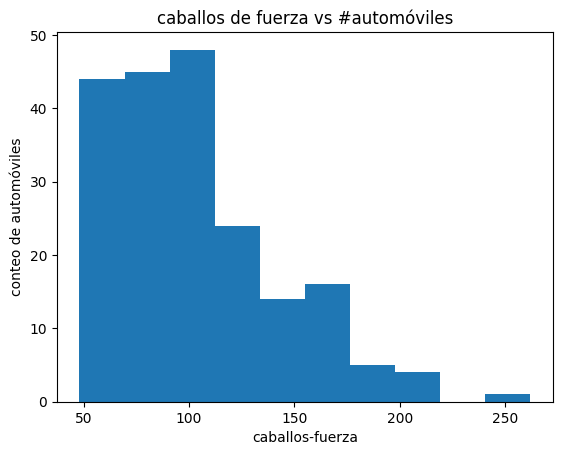

In [ ]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["caballos-fuerza"])

# Establecer las etiquetas x/y y el título del gráfico
plt.pyplot.xlabel("caballos-fuerza")
plt.pyplot.ylabel("conteo de automóviles")
plt.pyplot.title("caballos de fuerza vs #automóviles")

Nos gustaría tener 3 rangos de igual tamaño y para definirlos utilizaremos la función ```linspace(start_value, end_value, numbers_generated)``` de la librería numpy.
<br><br>
Como queremos incluir el valor mínimo de caballos de fuerza, vamos a establecer el valor ```start_value=min(df["caballos-fuerza"])```.
<br><br>
Como queremos incluir el valor máximo de caballos de fuerza, vamos a establecer el valor ```end_value=max(df["caballos-fuerza"])```.
<br><br>
Como estamos construyendo 3 categorías de igual tamaño, deben haber 4 puntos de corte, por lo que utilizaremos el parámetro ```numbers_generated=4```.
<br><br>
Con los datos anteriores, la función ```linspace()``` nos retornará un arreglo que contiene los valores que determinan cuándo inicia un rango e inicia otro.

In [ ]:
bins = np.linspace(min(df["caballos-fuerza"]), max(df["caballos-fuerza"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

Definimos los nombres de las categorías:

In [ ]:
group_names = ['Low', 'Medium', 'High']

Aplicamos la función ```cut```para determinar a qué caterogía pertenece cada valor de la columna ```df['caballos-fuerza']```.

In [ ]:
df['caballos-fuerza-discretos'] = pd.cut(df['caballos-fuerza'], bins, labels=group_names, include_lowest=True )
df[['caballos-fuerza','caballos-fuerza-discretos']].head(20)

,caballos-fuerza,caballos-fuerza-discretos
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


Veamos el número de automóviles de cada categoría:


In [ ]:
df["caballos-fuerza-discretos"].value_counts()

,count
caballos-fuerza-discretos,
Low,153
Medium,43
High,5


Grafiquemos la distribución de las nuevas categorías:

Text(0.5, 1.0, 'caballos de fuerza (valores discretos) vs #automóviles')

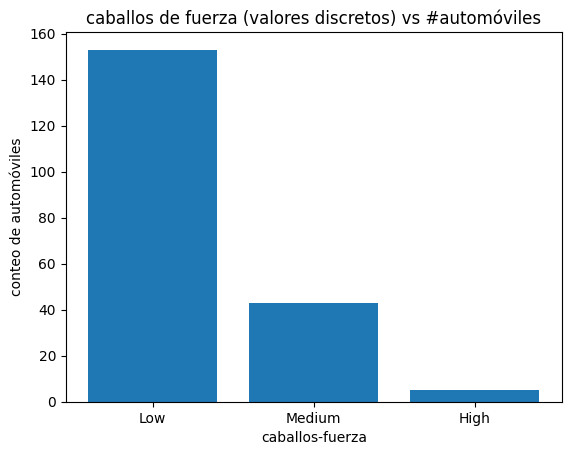

In [ ]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["caballos-fuerza-discretos"].value_counts())

# Establecer las etiquetas x/y y el título del gráfico
plt.pyplot.xlabel("caballos-fuerza")
plt.pyplot.ylabel("conteo de automóviles")
plt.pyplot.title("caballos de fuerza (valores discretos) vs #automóviles")

Hemos reducido con éxito el número de valores únicos (de 57 a 3). Si observamos el *data frame* podremos encontrar que la última columna especifica las caterogías para "caballos-fuerza" con 3 valores ("Low", "Medium" y "High").

In [ ]:
df.head()

,factor-riesgo,perdida-promedio-anual,fabricante,tipo-combustible,aspiracion,num-puertas,estilo-carroceria,traccion,ubicacion-motor,distancia-entre-ejes,...,calibre,carrera,relacion-compresion,caballos-fuerza,pico-rpm,millas_por_galon_ciudad,carretera-L/100km,precio,ciudad-L/100km,caballos-fuerza-discretos
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476,Low
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476,Low
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421,Medium
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667,Low
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556,Low


A continuación vamos a graficar el histograma del atributo "caballos-fuerza" agrupando los valores del eje x en 3 grupos.

Text(0.5, 1.0, 'caballos-fuerza por rangos')

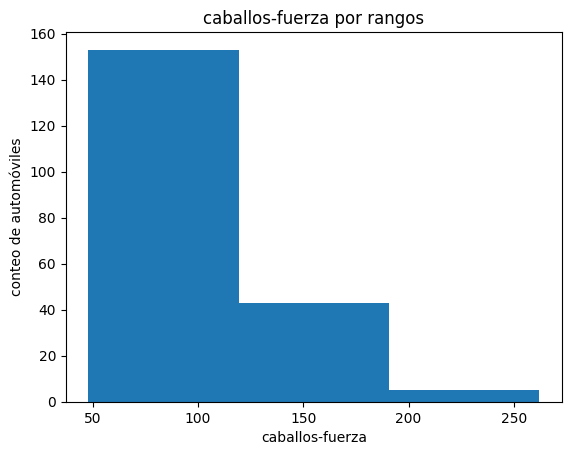

In [ ]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

a = (0,1,2)

# Graficar el histograma de "caballos-fuerza" con 3 rangos (bins = 3)
plt.pyplot.hist(df["caballos-fuerza"], bins = 3)

#  Establecer las etiquetas x/y y el título del gráfico
plt.pyplot.xlabel("caballos-fuerza")
plt.pyplot.ylabel("conteo de automóviles")
plt.pyplot.title("caballos-fuerza por rangos")

El gráfico anterior muestra que resultado que obtuvimos al discretizar el atributo "caballos-fuerza" en tres valores categóricos, evidentemente es correcto.

# **Variable indicadora (o variable ficticia)**

**Qué es una variable indicadora?**

Es una variable numérica que se utiliza para etiquetar categorías. Se les llama "ficticias" porque los números en sí no representan una cantidad y por lo tanto no tienen un significado inherente.
<br><br>
*Ejemplo*

En nuestro *data frame* vemos que la columna "tipo-combustible" tiene dos valores únicos: "gas" o "diesel". Un problema de regresión, no entiende palabras, solamente números. Por lo tanto, para utilizar este atributo en un análisis de regresión, debemos convertir a "tipo-combustible" en una variable indicadora.
<br><br>
Utilizaremos el método de pandas ```get_dummies```para asignarle valores numéricos a las diferentes categorías del atributo en cuestión. Este método nos retornará un nuevo *data frame* con dos columnas (una por cada valor único de "tipo-combustible") que corresponden a las variables indicadoras.

In [ ]:
# Obtener variables indicadoras y asignarlas al nuevo dataframe dummy_variable_1
dummy_variable_1 = pd.get_dummies(df["tipo-combustible"])
dummy_variable_1.head()

,diesel,gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


Cambiemos el nombre de las columnas para mayor claridad.

In [ ]:
dummy_variable_1.rename(columns={'gas':'tipo-combustible-gas', 'diesel':'tipo-combustible-diesel'}, inplace=True)
dummy_variable_1.head()


,tipo-combustible-diesel,tipo-combustible-gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


Insertaremos estas columnas en nuestro *dataset* original, y eliminamos la columna original "fuel-type".

In [ ]:
# Unir data frame "df" y "dummy_variable_1"
df = pd.concat([df, dummy_variable_1], axis=1)

# Eliminar la columna original "tipo-combustible" de "df"
df.drop("tipo-combustible", axis = 1, inplace=True)

In [ ]:
df.head()

,factor-riesgo,perdida-promedio-anual,fabricante,aspiracion,num-puertas,estilo-carroceria,traccion,ubicacion-motor,distancia-entre-ejes,longitud,...,relacion-compresion,caballos-fuerza,pico-rpm,millas_por_galon_ciudad,carretera-L/100km,precio,ciudad-L/100km,caballos-fuerza-discretos,tipo-combustible-diesel,tipo-combustible-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,8.703704,13495.0,11.190476,Low,False,True
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,8.703704,16500.0,11.190476,Low,False,True
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154,5000.0,19,9.038462,16500.0,12.368421,Medium,False,True
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102,5500.0,24,7.833333,13950.0,9.791667,Low,False,True
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115,5500.0,18,10.681818,17450.0,13.055556,Low,False,True


Las últimas dos columnas ahora son la variable indicadora que representan la variable original "tipo-combustible". Ahora todos sus valores son 0 o 1.

## Ejercicio 5

**Como se hizo en el ejemplo anterior, cree una variable indicadora para la columna "aspiracion" para representar los valores "std" y "turbo" con números. Una vez creada la variable indicadora, únala con el data frame original y elimine la columna "aspiracion"** Ingrese sus líneas de código a continuación:

In [ ]:
# Escriba su código a continuación y presione Shift + Enter para ejecutar

# Obtener la variable indicadora y asignarla al nuevo data frame "dummy_variable_2"
dummy_variable_2 = pd.get_dummies(df["aspiracion"])

# Cambiar los nombres de las columnas para mayor claridad
dummy_variable_2.rename(columns={'std':'aspiracion_std', 'turbo':'aspiracion_turbo'}, inplace=True)

# Unir data frame "df" y "dummy_variable_2"
df = pd.concat([df,dummy_variable_2], axis=1)

# Eliminar la columna original de "df"
df.drop("aspiracion", axis=1, inplace=True)

# Ver el resultado
df.head()

,factor-riesgo,perdida-promedio-anual,fabricante,num-puertas,estilo-carroceria,traccion,ubicacion-motor,distancia-entre-ejes,longitud,anchura,...,pico-rpm,millas_por_galon_ciudad,carretera-L/100km,precio,ciudad-L/100km,caballos-fuerza-discretos,tipo-combustible-diesel,tipo-combustible-gas,aspiracion_std,aspiracion_turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,8.703704,13495.0,11.190476,Low,False,True,True,False
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,8.703704,16500.0,11.190476,Low,False,True,True,False
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,5000.0,19,9.038462,16500.0,12.368421,Medium,False,True,True,False
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,5500.0,24,7.833333,13950.0,9.791667,Low,False,True,True,False
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,5500.0,18,10.681818,17450.0,13.055556,Low,False,True,True,False


**SOLUCIÓN DEL EJERCICIO:**

Haga doble clic **aquí** para ver la solución del Ejercicio 5.

<!-- La respuesta es la siguiente:
# Obtener la variable indicadora y asignarla al nuevo data frame "dummy_variable_2"
dummy_variable_2 = pd.get_dummies(df["aspiracion"])

# Cambiar los nombres de las columnas para mayor claridad
dummy_variable_2.rename(columns={'std':'aspiracion_std', 'turbo':'aspiracion_turbo'}, inplace=True)

# Unir data frame "df" y "dummy_variable_2"
df = pd.concat([df,dummy_variable_2], axis=1)

# Eliminar la columna original de "df"
df.drop("aspiracion", axis=1, inplace=True)

# Ver el resultado
df.head()
-->

Finalmente, si lo desea, guarde el *dataset* en su nueva versión.

In [ ]:
from google.colab import files
df.to_csv("clean_df.csv")
files.download("clean_df.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<h3>Acerca de los autores:</h3>

Este cuaderno se hizo con base en el diseñado por <a href="https://www.linkedin.com/in/mahdi-noorian-58219234/" target="_blank">Mahdi Noorian PhD</a>, <a href="https://www.linkedin.com/in/joseph-s-50398b136/" target="_blank">Joseph Santarcangelo</a>, Bahare Talayian, Eric Xiao, Steven Dong, Parizad, Hima Vsudevan, <a href="https://www.linkedin.com/in/fiorellawever/" target="_blank">Fiorella Wenver</a> and <a href=" https://www.linkedin.com/in/yi-leng-yao-84451275/ " target="_blank" >Yi Yao</a>.

---

Utilizamos y modificamos el cuaderno original, acogiéndonos a la Licencia <a href="https://cognitiveclass.ai/mit-license/">MIT License</a>.